# Plotting Exercise

## Wealth and Democracy

Let's now pivot from working with example data to real data. Load the World Development Indicator data you worked with over the summer. This is country-level data that includes information on both countries' GDP per capita (a measure of wealth) and the Polity IV scores (a measure of how democratic a country is -- countries with higher scores are liberal democracies, countries with low scores are autocratic.). Use the code below to download the data. 

In [4]:
import pandas as pd
wdi = pd.read_csv('https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/world-small.csv')

Your data should look like this: 

In [5]:
wdi.head()

country      region  gdppcap08  polityIV
0    Albania  C&E Europe       7715      17.8
1    Algeria      Africa       8033      10.0
2     Angola      Africa       5899       8.0
3  Argentina  S. America      14333      18.0
4    Armenia  C&E Europe       6070      15.0

### Exercise 6

Let's being analyzing this data by estimating a simple linear model ("ordinary least squares") of the relationship between GDP per capita (`gdppcap08`) and democracy scores (`polityIV`). We will do so using the `statsmodel` package, which we'll discuss in detail later is this course. For the momement, just use this code:

```python
import statsmodels.formula.api as smf
results = smf.ols('polityIV ~ gdppcap08',
                   data=wdi).fit()
print(results.summary())
```


In [6]:
import statsmodels.formula.api as smf
results = smf.ols('polityIV ~ gdppcap08',
                   data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Wed, 17 Jul 2019   Prob (F-statistic):            0.00915
Time:                        14:38:40   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

### Exercise 7

Based on the results of this analysis, what would you conclude about about the relationship between `gdppcap08` and `polityIV`? 

(If you aren't familiar with Linear Models and aren't sure how to interprete this, you can also just look at the simple correlation between these two variables using `wdi[['polityIV', 'gdppcap08']].corr()`.)

Write down your conclusions. 

### Exercise 8

Now let's plot the relationship you just estimated statistically. First, use `plotnine` to create a scatter plot of `polityIV` and `gdppcap08`. 

/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


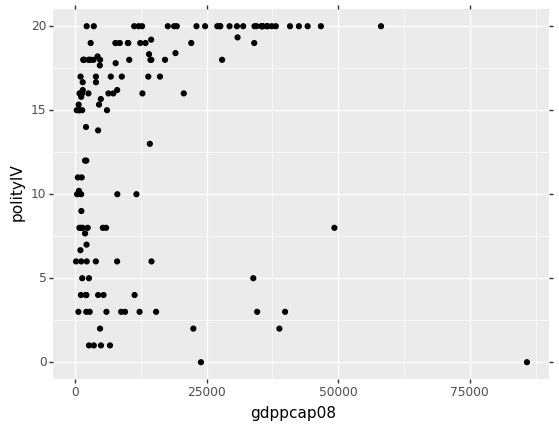

<ggplot: (7548295863)>

In [11]:
from plotnine import *
ggplot(wdi, aes(x='gdppcap08', y='polityIV')) + geom_point()

### Exercise 9

Now overlay the linear model you just estimated. You can do this by adding a `geom_smooth()` layer, where the `method` argument is set to `'lm'` (for linear model). 

/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/Nick/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


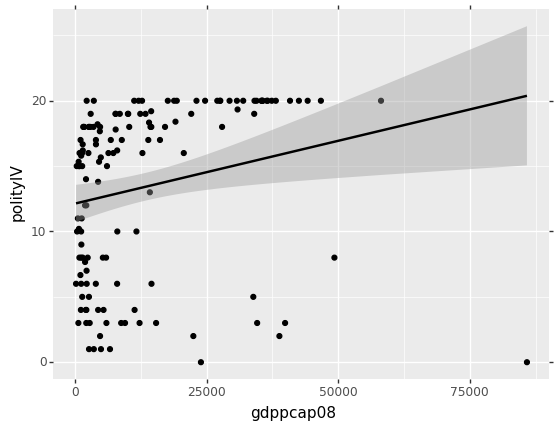

<ggplot: (-9223372029306363406)>

In [12]:
ggplot(wdi, aes(x='gdppcap08', y='polityIV')) + geom_point() + geom_smooth(method='lm')

### Exercise 10

Does it seem like the linear model you estimated fits the data well?

### Exercise 11

Linear models impose a very strict *functional form* on the model they use: they try to draw a straight line through the data, no matter what. Let's consider a more flexible functional form. Change the `method` in your `geom_smooth` to `"lowess"`. This is a form of local polynomial regression that is designed to be flexible in how it fits the data. 

/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


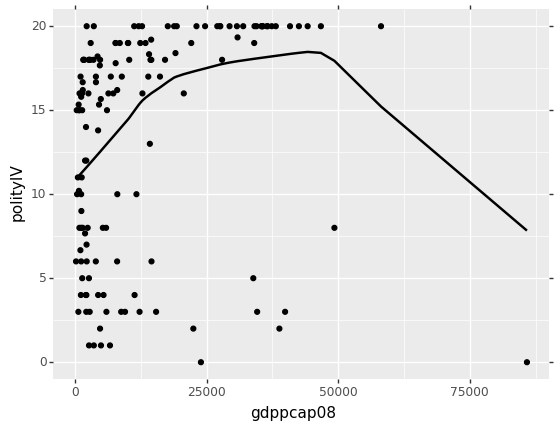

<ggplot: (-9223372029306167096)>

In [14]:
import numpy as np
#wdi['loggdp'] = np.log(wdi.gdppcap08)
ggplot(wdi, aes(x='gdppcap08', y='polityIV')) + geom_point() + geom_smooth(method='lowess')

### Exercise 12

This does seem to fit the data better, but there's clearly this HUGE outlier in the bottom right. Who is that? Using `geom_text()`, label the points on your graph with country names. 

### Exercise 13

Interesting. It seems that there's are a lot of rich, undemocratic countries that all have something in common: they're oil-rich, small, Middle Eastern countries.

Let's see what happens if we exclude the ten countries with the highest per-capita oil production from our data: Qatar, Kuwait, Equatorial Guinea, United Arab Emirates (UAE), Norway, Brunei, Saudi Arabia, Libya, Oman, and Gabon. (Note this was in 2007!)

To do this, I would recomment creating a new variable called `bigproducer` that is `True` if `country` matches a name in that list, and `False` otherwise. You may find [the `isin` method useful.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html) 

/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/Nick/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


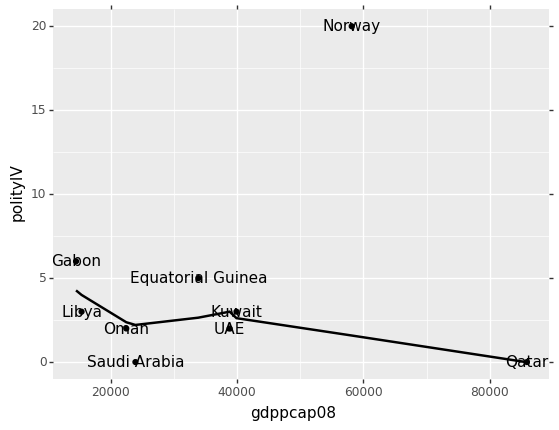

<ggplot: (7568773110)>

In [107]:
import numpy as np
wdi['loggdp'] = np.log(wdi.gdppcap08)
wdi['bigproducer'] = wdi['country'].isin(["Qatar", "Kuwait", 
                                          "Equatorial Guinea", 
                                          "UAE", 
                                          "Norway", "Brunei", 
                                          "Saudi Arabia", "Libya", 
                                          "Oman", "Gabon"])

(ggplot(wdi[wdi.bigproducer == 1], aes(x='gdppcap08', y='polityIV')) + 
        geom_smooth(method='lowess') + geom_point() + geom_text(aes(label='country')))

### Exercise 13

Let's make sure that you accurately identified all 10 of the oil producers. Is the value of  `wdi['bigproducer'].sum()` 10? If not, can you figure out what you did wroon

### Exercise 14

How does the relationship between GDP per capita and Polity look without those oil producers? Does it look the same as it did without the oil producers?

## Exercise 15

Now that we've gotten a good sense of the relationship between wealth and democracy for non-oil producers, can we draw any conclusions about the relationship between polity scores and wealth for the oil producers? Plot the polity / GDP per capita relationship *just* for the oil producers.

## Exercise 16

Look a

In [37]:
df[df.country !="Qatar"][['gdppcap08', 'polityIV']].corr()

gdppcap08  polityIV
gdppcap08   1.000000  0.317762
polityIV    0.317762  1.000000